In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [2]:
df=pd.read_csv('../output/no_outliers.csv',index_col=False)
# df.FamilyIncome=(df.FamilyIncome-df.FamilyIncome.mean())/df.FamilyIncome.std()
X=df[['ASVAB','HighSchoolGrade']]
y=df.FamilyIncome

In [3]:
df

,ASVAB,FamilyIncome,HighSchoolGrade
0,45.070,50000,7.0
1,58.483,81000,5.0
2,27.978,150250,6.0
3,22.001,55000,3.0
4,3.585,14766,5.0
...,...,...,...
5015,18.599,38000,5.0
5016,12.716,30441,3.0
5017,27.785,33500,5.0
5018,96.478,40400,7.0


**Let's check for any obvious trends**

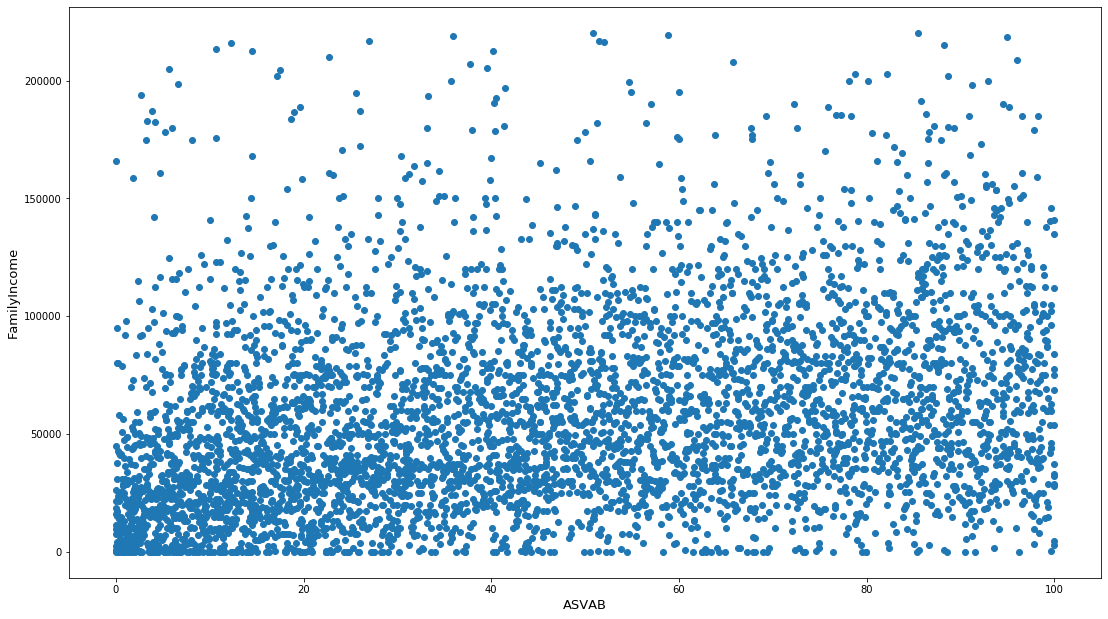

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(x = df.ASVAB, y =df.FamilyIncome)
plt.ylabel('FamilyIncome', fontsize=13)
plt.xlabel('ASVAB', fontsize=13)
plt.show()
plt.close()

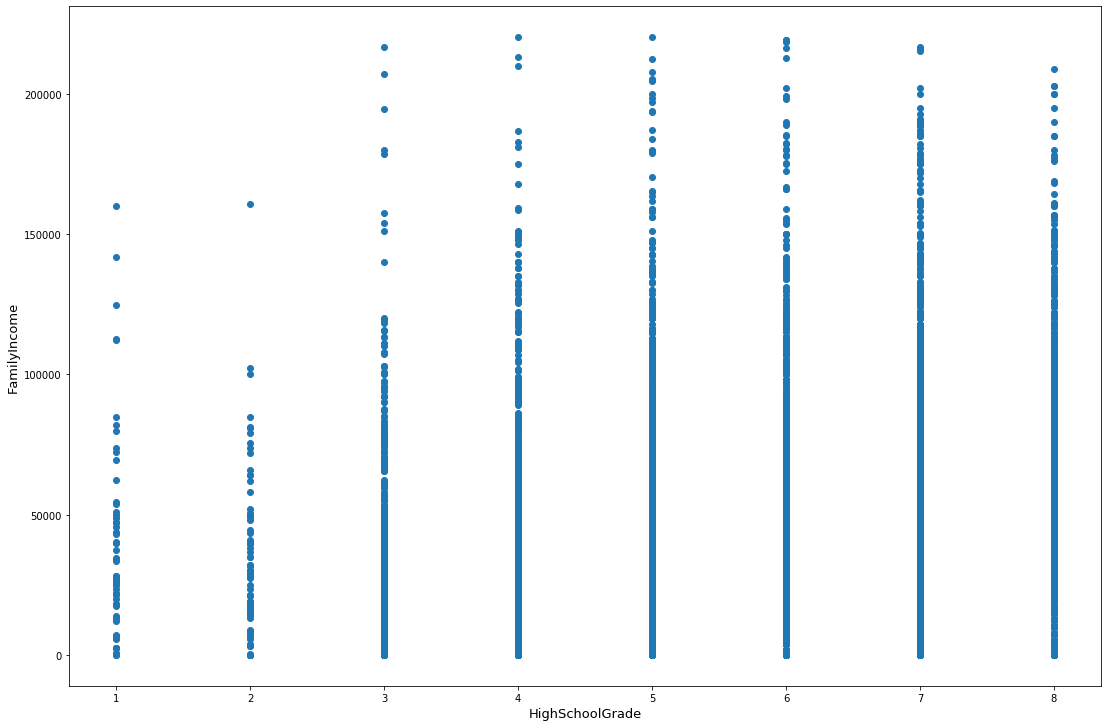

In [5]:
fig,ax=plt.subplots()
fig.set_size_inches(18.5, 12.5)

ax.scatter(x = df.HighSchoolGrade, y =df.FamilyIncome)
plt.ylabel('FamilyIncome', fontsize=13)
plt.xlabel('HighSchoolGrade', fontsize=13)
plt.show()
plt.close()

**From the graphs we can expect low correlations**

In [6]:
df.corr()

,ASVAB,FamilyIncome,HighSchoolGrade
ASVAB,1.000000,0.303217,0.473841
FamilyIncome,0.303217,1.000000,0.226380
HighSchoolGrade,0.473841,0.226380,1.000000


In [7]:
print(X.shape)
print(y.shape)


(5020, 2)
(5020,)


In [15]:
y

0        50000
1        81000
2       150250
3        55000
4        14766
         ...  
5015     38000
5016     30441
5017     33500
5018     40400
5019     19643
Name: FamilyIncome, Length: 5020, dtype: int64

In [18]:
# checking the p values
import statsmodels.api as sm
X = sm.add_constant(X)

mod = sm.OLS( y,X)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           FamilyIncome   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     281.1
Date:                Wed, 19 Aug 2020   Prob (F-statistic):          1.98e-116
Time:                        13:03:35   Log-Likelihood:                -60169.
No. Observations:                5020   AIC:                         1.203e+05
Df Residuals:                    5017   BIC:                         1.204e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.583e+04   2026.530     

In [16]:
regressor = LinearRegression()  
regressor.fit(X, y)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
print(coeff_df)
#To retrieve the intercept:
print(regressor.intercept_)
print(regressor.score(X, y))

                 Coefficient
ASVAB             352.679752
HighSchoolGrade  2759.348803
25827.84370446935
0.100761010727623


**Let's try splitting the data**

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:

print(X_train.shape)
print(y_train.shape)

regressor2 = LinearRegression()  
regressor2.fit(X_train, y_train) #training the algorithm

(4016, 2)
(4016,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
coeff_df_2 = pd.DataFrame(regressor2.coef_, X.columns, columns=['Coefficient'])  

print(coeff_df_2)
print(regressor2.intercept_)
print(regressor2.score(X_train, y_train))
print(regressor2.score(X_test, y_test))

                 Coefficient
ASVAB               0.009116
HighSchoolGrade     0.068942
-0.8098562254515441
0.1108636356322874
0.056599600663490346


In [105]:
y_pred = regressor2.predict(X_test)
y_pred_2 = regressor2.predict(X_train)

print(1-(((y_pred-y_test)**2).sum()/((y_test - y_test.mean()) ** 2).sum()))
print(1-(((y_pred_2-y_train)**2).sum()/((y_train - y_train.mean()) ** 2).sum()))

0.056599600663490346
0.1108636356322874


In [78]:
print(metrics.r2_score(y_test,y_pred))

0.056599600663490235


In [79]:
from sklearn import metrics


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 29.92879010575464
Mean Squared Error: 1538.0718148352082
Root Mean Squared Error: 39.218258692032826


**Visualizing models**

In [19]:
from mpl_toolkits.mplot3d import Axes3D


In [20]:
x_pred1 = np.linspace(1, 8, 8)   # range of grades values
y_pred1 = np.linspace(0, 100, 100)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred1, y_pred1)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [21]:
X = df[['HighSchoolGrade', 'ASVAB']].values.reshape(-1,2)
Y = df['FamilyIncome']

In [23]:
x = np.random.choice(X[:, 0],200)
y = np.random.choice(X[:, 1],200)
z = np.random.choice(Y,200)
print(z)

[ 22000  33000  49250 107720  20250  74796  57500  84750  73000  37500
  79320  79750   5000  69409  69000  68000  48864  35343      0  82236
  43158  58750  12877    455  25250 188750  83188  18820   7750  47505
  19750  93000 108000   7500  53250  28000  34173  97750  75250  95250
  80000  30000  33075  22500  75250 154000  69193  45000  45550  93750
  54500 108857  75000  20450  30000  83750  27750   1200  21497   5500
  83050  50000    350  50877  21177  85750  60300 101500 160500  56500
  56900  26100 115010  10500   7500  20000  35000  42600  40001   3500
 146629 154000  50000  35742 126000  71500  21750  92000   2750  42000
 147530  33000  84500  85000  50600  44000    750  32000  62000   3000
  65650  13750   3750  80200   8000    750 180100  22000  57000  48900
  72500  30990  13285  43006  51500  16251  19004  27187  62000 103120
  82000  29343  25500  65000  96250  16800  37500  17500  80000  51755
  21177  38250    220  10500  31000  85000  32000  75500  40600 126640
  5010

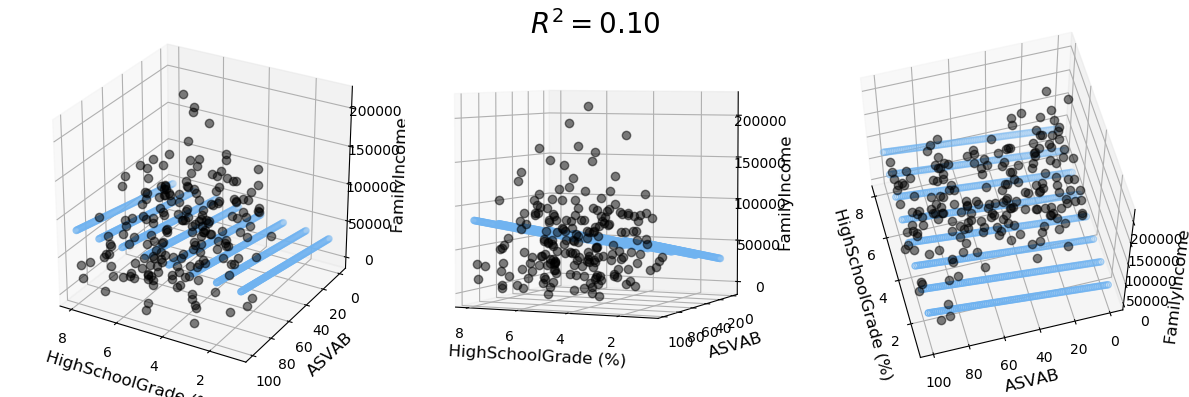

In [24]:
x_pred = np.linspace(1, 8, 8)   # range of porosity values
y_pred = np.linspace(0, 100, 100)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T


ols = LinearRegression()  
model = ols.fit(X, Y)
predicted = model.predict(model_viz)


r2 = model.score(X, Y)

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('HighSchoolGrade (%)', fontsize=12)
    ax.set_ylabel('ASVAB', fontsize=12)
    ax.set_zlabel('FamilyIncome', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
    
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [25]:
df.FamilyIncome

0      -0.182664
1       0.574338
2       2.265382
3      -0.060567
4      -1.043057
          ...   
5015   -0.475697
5016   -0.660283
5017   -0.585584
5018   -0.417090
5019   -0.923964
Name: FamilyIncome, Length: 5020, dtype: float64